# Twospirals

## A) First, train a Linear/Logistic Regression (library, logistic if data labels are categories) and confirm that it doesnt work , i.e. it has a high classification error or high Root Mean Squared Error.

In [1]:
import pandas as pd

df = pd.read_csv('twoSpirals.txt', sep='\s+', engine='python')

In [3]:
df

,X1,X2,Y
0,10.5192,-0.7170,-1.0
1,0.9987,-9.9681,-1.0
2,3.5763,8.3756,-1.0
3,1.9236,-10.6448,-1.0
4,8.1583,-5.9066,-1.0
...,...,...,...
995,6.6583,2.7518,1.0
996,-4.1388,-6.6074,1.0
997,-1.0998,-6.9606,1.0
998,5.3105,4.6691,1.0


In [4]:
df_plus = df[df['Y'] == 1]
df_minus = df[df['Y'] == -1]

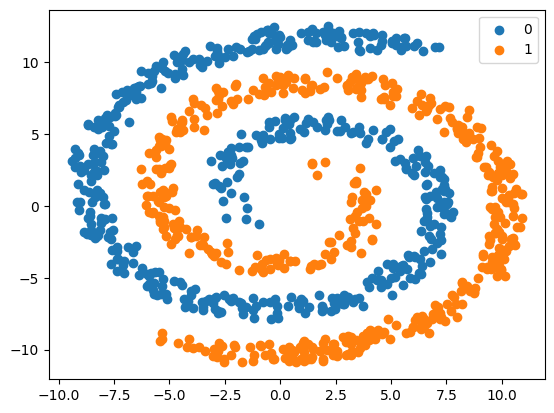

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df_plus['X1'], df_plus['X2'], label='0')
plt.scatter(df_minus['X1'], df_minus['X2'], label='1')
plt.legend()


In [21]:
X = df[['X1', 'X2']]
y = df['Y']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_rsmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("accuracy", lr_accuracy)
print("rmse", lr_rsmse)


accuracy 0.665
rmse 1.1575836902790226


## B) Run KernelPCA with Gaussian Kernel to obtain a representation of T features. For reference these steps we demoed in class (Matlab):

In [16]:
def gaussian_kernel(df, sigma, T):
    X = df[['X1', 'X2']]
    n = X.shape[0]
    X = X.to_numpy()

    kernel = np.zeros((n , n))

    for i in range(n):
        for j in range(n):
            diff = X[i] - X[j]
            num = diff.T @ diff
            denom = 2 * (sigma**2)
            kernel_value = np.exp(-(num/denom))
            kernel[i, j] = kernel_value

    x = np.ones((n, n)) / n 
    kernel_spiral_centered = kernel - x @ kernel - kernel @ x + x @ kernel @ x
    eigenvalues, eigenvectors = np.linalg.eig(kernel_spiral_centered)
    eigenvectors = np.real(eigenvectors)
    eigenvectors_top_20 = eigenvectors[:T]
    X_new = kernel_spiral_centered @ eigenvectors_top_20.T
    
    return X_new

## C) Retrain the regression algorithm on the same data kernelized / dual form. How large T needs to be to get good performance?

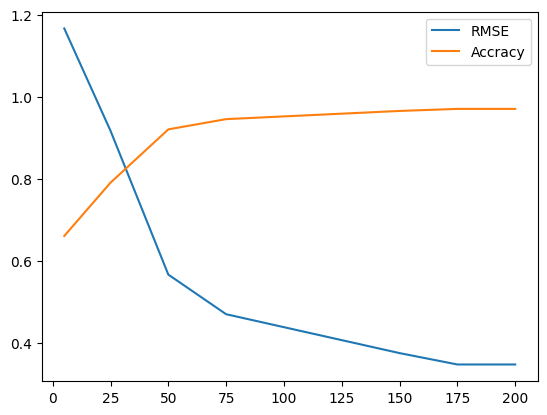

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

t_vals = [5,25, 50, 75, 150, 175, 200]
rmses = []
accuracies = []

for t in t_vals:
    X_new = gaussian_kernel(df, 3, t)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
    lr = LogisticRegression(penalty='l2')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    lr_accuracy = accuracy_score(y_test, y_pred)
    lr_rsmse = np.sqrt(mean_squared_error(y_test, y_pred))
    accuracies.append(lr_accuracy)
    rmses.append(lr_rsmse)

plt.plot(t_vals, rmses, label='RMSE')
plt.plot(t_vals, accuracies, label='Accracy')
plt.legend()



From the graph we can infer that T should be somewhere between 150 and 175 as after that accuracy score becomes constant that is 0.97.

# Three circles

## A) First, train a Linear/Logistic Regression (library, logistic if data labels are categories) and confirm that it doesnt work , i.e. it has a high classification error or high Root Mean Squared Error.

In [3]:
import pandas as pd

df = pd.read_csv('threecircles.txt', sep=',', engine='python')

In [4]:
df.head()

,X1,X2,Y
0,-0.208626,-0.264189,-1
1,0.499955,-0.073624,-1
2,-0.241661,-0.221071,-1
3,-0.356841,0.204201,-1
4,0.529480,0.170605,-1


In [5]:
df.columns = ['X1', 'X2', 'Y']

In [6]:
df_plus = df[df['Y'] == 1]
df_minus = df[df['Y'] == -1]

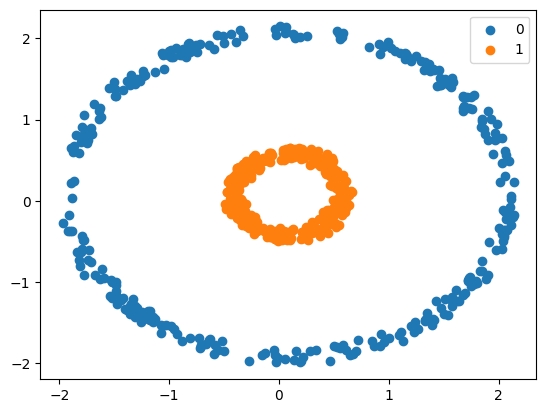

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df_plus['X1'], df_plus['X2'], label='0')
plt.scatter(df_minus['X1'], df_minus['X2'], label='1')
plt.legend()


In [8]:
X = df[['X1', 'X2']]
y = df['Y']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
lr_rsmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("accuracy", lr_accuracy)
print("rmse", lr_rsmse)


accuracy 0.275
rmse 1.2328828005937953


## B) Run KernelPCA with Gaussian Kernel to obtain a representation of T features. For reference these steps we demoed in class (Matlab):

In [21]:
def gaussian_kernel(df, sigma, T):
    X = df[['X1', 'X2']]
    n = X.shape[0]
    X = X.to_numpy()

    kernel = np.zeros((n , n))

    for i in range(n):
        for j in range(n):
            diff = X[i] - X[j]
            num = diff.T @ diff
            denom = 2 * (sigma**2)
            kernel_value = np.exp(-(num/denom))
            kernel[i, j] = kernel_value

    x = np.ones((n, n)) / n 
    kernel_spiral_centered = kernel - x @ kernel - kernel @ x + x @ kernel @ x
    eigenvalues, eigenvectors = np.linalg.eig(kernel_spiral_centered)
    eigenvectors = np.real(eigenvectors)
    eigenvectors_top_20 = eigenvectors[:T]
    X_new = kernel_spiral_centered @ eigenvectors_top_20.T
    
    return X_new

## C) Retrain the regression algorithm on the same data kernelized / dual form. How large T needs to be to get good performance?

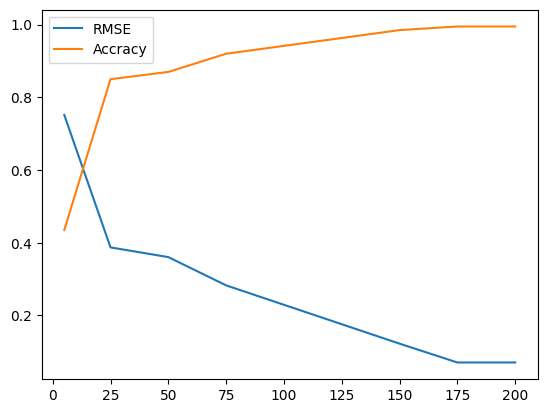

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

t_vals = [5,25, 50, 75, 150, 175, 200]
rmses = []
accuracies = []

for t in t_vals:
    X_new = gaussian_kernel(df, 3, t)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
    
    lr = LogisticRegression(penalty='l2')
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    lr_accuracy = accuracy_score(y_test, y_pred)
    lr_rsmse = np.sqrt(mean_squared_error(y_test, y_pred))
    accuracies.append(lr_accuracy)
    rmses.append(lr_rsmse)

plt.plot(t_vals, rmses, label='RMSE')
plt.plot(t_vals, accuracies, label='Accracy')
plt.legend()

In [23]:
accuracies

[0.435, 0.85, 0.87, 0.92, 0.985, 0.995, 0.995]